In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv('./data/creditcard.csv')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
data_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = data_df.drop(['Class'], axis=1)
y = data_df['Class']

print(f"Fraudulent transactions: {y.where(y == 1).count()}, {y.where(y == 1).count() / y.count() * 100:0,.3f}%")
print(f"Non-Fraudulent transactions: {y.where(y == 0).count()}, {y.where(y == 0).count() / y.count() * 100:0,.3f}%")


Fraudulent transactions: 492, 0.173%
Non-Fraudulent transactions: 284315, 99.827%


Since we are having only 0.173% of data with positive (fraudulent) label, we would need to monitor precision & recall. I guess we should aim for high precison, since if we have too many transactions happening at the same time, we would like to lower the amount of false-positives (e.g not to overload our bank support team) 

In [6]:
X_main, X_test, y_main, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_main, y_main, test_size=0.25)

In [7]:
print(f"X-train: {X_train.shape}, y-train: {y_train.shape}\n X-cv: {X_cv.shape}, y-cv: {y_cv.shape}\nX-test: {X_test.shape}, y-test: {y_test.shape}\n")

X-train: (170883, 30), y-train: (170883,)
 X-cv: (56962, 30), y-cv: (56962,)
X-test: (56962, 30), y-test: (56962,)



In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5).fit(X_train, y_train)

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [11]:
y_prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)

print(f"Accuracy = {accuracy:0.3f}, F1 Score = {f1:0.3f}, precision = {precision:0.2f}, recall = {recall:0.2f}")

Accuracy = 0.999, F1 Score = 0.843, precision = 0.91, recall = 0.79


### Model selection

We can see that precision is already pretty good, but let's try to do model selection to see if we can improve it even further

In [12]:
trees_count = 100
max_depths = [2, 5, 10, 15, 100]
min_samples_per_split = [3, 5, 10, 25, 50, 100]

accuracy_list_train = []
accuracy_list_cv = []
f1_scores_cv = []

for depth in max_depths:
    for min_samples in min_samples_per_split:
        model = RandomForestClassifier(
            n_estimators=trees_count, 
            max_depth=depth, 
            min_samples_split=min_samples, 
            criterion='entropy',
            class_weight='balanced'
        ).fit(X_train, y_train)

        y_prediction_train = model.predict(X_train)
        y_prediction_cv = model.predict(X_cv)

        accuracy_train = accuracy_score(y_train, y_prediction_train)
        accuracy_cv = accuracy_score(y_cv, y_prediction_cv)
        f1_cv = f1_score(y_cv, y_prediction_cv)

        accuracy_list_train.append(accuracy_train)
        accuracy_list_cv.append(accuracy_cv)
        f1_scores_cv.append(f1_cv)

        precision_cv = precision_score(y_cv, y_prediction_cv)
        recall_cv = recall_score(y_cv, y_prediction_cv)

        print(f"Max depth: {depth}, Min samples per split: {min_samples}")
        print(f"Train accuracy = {accuracy_train:0.3f}, CV accuracy = {accuracy_cv:0.3f}, F1 Score = {f1_cv:0.3f}, precision = {precision_cv:0.2f}, recall = {recall_cv:0.2f}")
        print("================================================================================================")




Max depth: 2, Min samples per split: 3
Train accuracy = 0.998, CV accuracy = 0.998, F1 Score = 0.547, precision = 0.41, recall = 0.82
Max depth: 2, Min samples per split: 5
Train accuracy = 0.998, CV accuracy = 0.998, F1 Score = 0.569, precision = 0.43, recall = 0.83
Max depth: 2, Min samples per split: 10
Train accuracy = 0.998, CV accuracy = 0.998, F1 Score = 0.552, precision = 0.41, recall = 0.83
Max depth: 2, Min samples per split: 25
Train accuracy = 0.998, CV accuracy = 0.998, F1 Score = 0.546, precision = 0.41, recall = 0.83
Max depth: 2, Min samples per split: 50
Train accuracy = 0.998, CV accuracy = 0.998, F1 Score = 0.590, precision = 0.46, recall = 0.83
Max depth: 2, Min samples per split: 100
Train accuracy = 0.998, CV accuracy = 0.998, F1 Score = 0.625, precision = 0.50, recall = 0.82
Max depth: 5, Min samples per split: 3
Train accuracy = 0.999, CV accuracy = 0.999, F1 Score = 0.672, precision = 0.56, recall = 0.83
Max depth: 5, Min samples per split: 5
Train accuracy = 0

Let's plot some graphs, to visualize training process and see if we have high bias / variance

In [13]:
import matplotlib.pyplot as plt

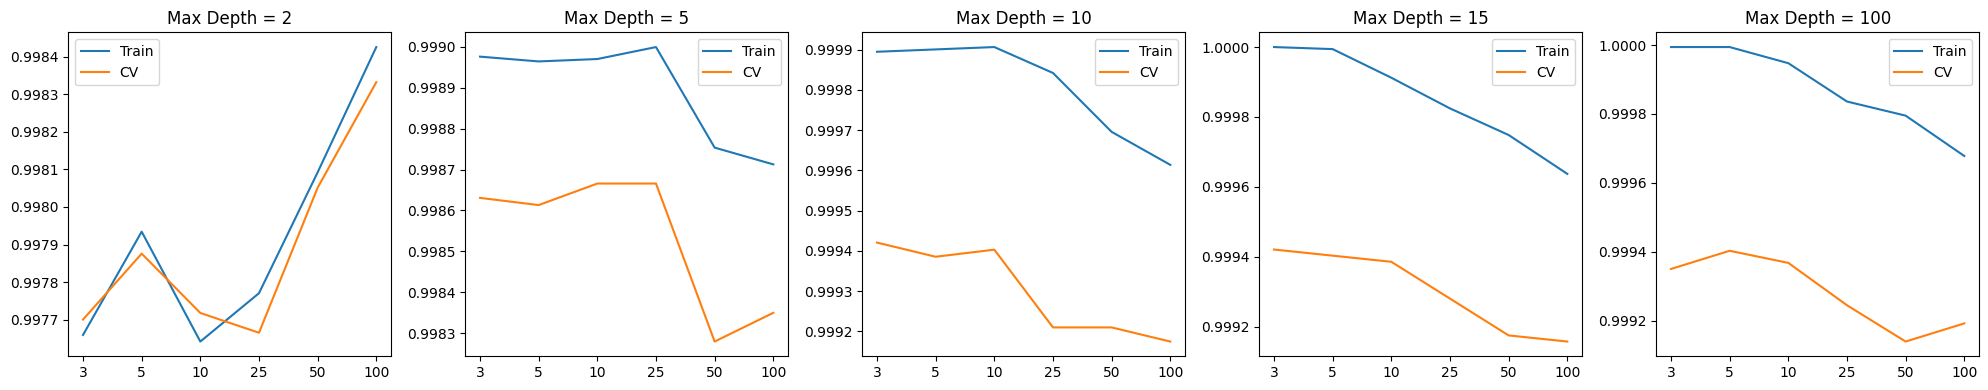

In [14]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, depth in enumerate(max_depths):
    start = i * len(min_samples_per_split)
    end = (i + 1) * len(min_samples_per_split)
    
    axes[i].set_title(f'Max Depth = {depth}')

    axes[i].set_xticks(range(len(min_samples_per_split)))
    axes[i].set_xticklabels(min_samples_per_split)

    axes[i].plot(accuracy_list_train[start:end])
    axes[i].plot(accuracy_list_cv[start:end])

    axes[i].legend(['Train', 'CV'])

plt.tight_layout()

Now let's plot the F1 Score

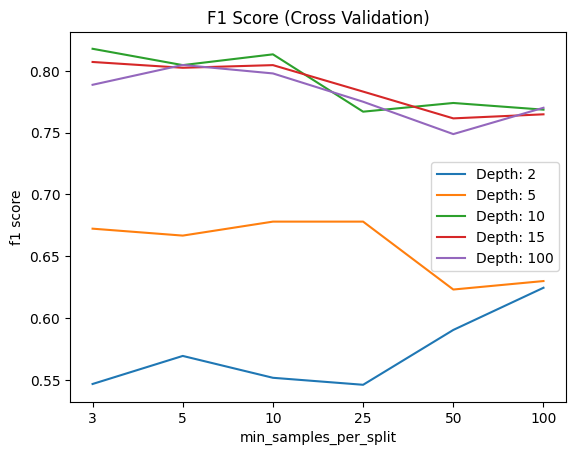

In [15]:
plt.title("F1 Score (Cross Validation)")
plt.xlabel('min_samples_per_split')
plt.ylabel('f1 score')

plt.xticks(ticks=range(len(min_samples_per_split)), labels=min_samples_per_split)

depth_legend = []

for i, depth in enumerate(max_depths):
    depth_legend.append(f"Depth: {depth}")

    start = i * len(min_samples_per_split)
    end = (i + 1) * len(min_samples_per_split)

    plt.plot(f1_scores_cv[start:end])

plt.legend(depth_legend)

Looks like we are hitting the wall at **~0.82** F1 score. Let's pick the example that gives us the highest F1 score value

In [16]:
import numpy as np

highest_f1_score_index = np.argmax(f1_scores_cv)

optimal_max_depth_index = highest_f1_score_index // len(max_depths)

optimal_max_depth = max_depths[optimal_max_depth_index]
optimal_min_samples_per_split = min_samples_per_split[optimal_max_depth_index + highest_f1_score_index % optimal_max_depth_index]

print(f"Highest F1 score: {f1_scores_cv[highest_f1_score_index]}, optimal max depth: {optimal_max_depth}, optimal min samples per split {optimal_min_samples_per_split}")

Highest F1 score: 0.8176795580110497, optimal max depth: 10, optimal min samples per split 10


Finally let's calculate our metrics on top of a test dataset

In [17]:
model = RandomForestClassifier(
    n_estimators=trees_count, 
    criterion='entropy', 
    class_weight='balanced',
    max_depth=optimal_max_depth,
    min_samples_split=optimal_min_samples_per_split,
).fit(X_train, y_train)

y_prediction_train = model.predict(X_train)
y_prediction_test = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_prediction_train)
accuracy_test = accuracy_score(y_test, y_prediction_test)
f1_test = f1_score(y_test, y_prediction_test)

precision_test = precision_score(y_test, y_prediction_test)
recall_test = recall_score(y_test, y_prediction_test)

print(f"Train accuracy = {accuracy_train:0.3f}, Test accuracy = {accuracy_test:0.3f}, F1 Score = {f1_test:0.3f}, precision = {precision_test:0.2f}, recall = {recall_test:0.2f}")


Train accuracy = 1.000, Test accuracy = 1.000, F1 Score = 0.868, precision = 0.91, recall = 0.83


In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

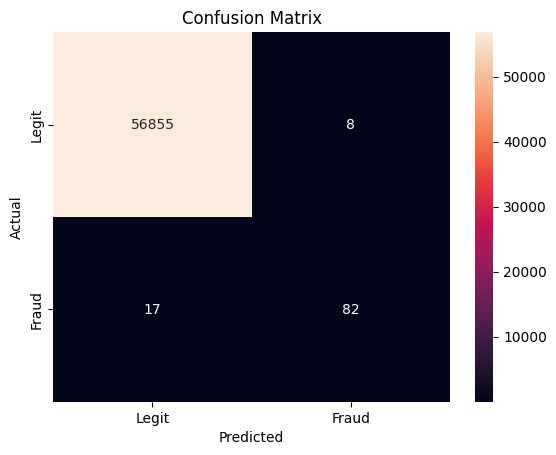

In [19]:
confusion = confusion_matrix(y_test, y_prediction_test)

sns.heatmap(confusion, xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'], annot=True, fmt="d")

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()